In [0]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [0]:
import matplotlib.pyplot as plt
import torchvision.datasets
from google.colab import drive
import sys

In [3]:
drive.mount('/content/drive')
sys.path.append('drive/My Drive/Colab Notebooks')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from LeNet5 import *
from FirstCustomNN import *
from SecondCustomNN import *

In [0]:
def trainig(neural_network, X_test, y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    neural_network = neural_network.to(device)

    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(neural_network.parameters(), lr=1.0e-3)

    batch_size = 100

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(15):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
          
            batch_indexes = order[start_index:start_index+batch_size]
          
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)
          
            preds = neural_network.forward(X_batch) 
          
            loss_value = loss(preds, y_batch)
            loss_value.backward()
          
            optimizer.step()
          
        test_preds = neural_network.forward(X_test)
        test_loss_history.append(loss(test_preds, y_test).data.cpu())
      
        accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
        test_accuracy_history.append(accuracy)
      
        print("error rate: " + str(1 - accuracy))

    return test_accuracy_history

In [0]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [8]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [0]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [10]:
lenet5 = LeNet5()
lenet5_accuracy_history = trainig(lenet5, X_train, y_train)




error rate: tensor(0.0308)
error rate: tensor(0.0197)
error rate: tensor(0.0152)
error rate: tensor(0.0122)
error rate: tensor(0.0115)
error rate: tensor(0.0103)
error rate: tensor(0.0113)
error rate: tensor(0.0082)
error rate: tensor(0.0093)
error rate: tensor(0.0074)
error rate: tensor(0.0075)
error rate: tensor(0.0066)
error rate: tensor(0.0071)
error rate: tensor(0.0069)
error rate: tensor(0.0059)


In [11]:
first_custom = FirstCustomNN()
first_custom_accuracy_history = trainig(first_custom, X_train, y_train)

error rate: tensor(0.0403)
error rate: tensor(0.0292)
error rate: tensor(0.0219)
error rate: tensor(0.0188)
error rate: tensor(0.0174)
error rate: tensor(0.0141)
error rate: tensor(0.0124)
error rate: tensor(0.0113)
error rate: tensor(0.0095)
error rate: tensor(0.0116)
error rate: tensor(0.0090)
error rate: tensor(0.0096)
error rate: tensor(0.0083)
error rate: tensor(0.0077)
error rate: tensor(0.0115)


In [12]:
second_custom = Custom_2()
second_custom_accuracy_history = trainig(second_custom, X_train, y_train)

error rate: tensor(0.0338)
error rate: tensor(0.0207)
error rate: tensor(0.0170)
error rate: tensor(0.0133)
error rate: tensor(0.0137)
error rate: tensor(0.0123)
error rate: tensor(0.0143)
error rate: tensor(0.0090)
error rate: tensor(0.0084)
error rate: tensor(0.0074)
error rate: tensor(0.0074)
error rate: tensor(0.0082)
error rate: tensor(0.0083)
error rate: tensor(0.0076)
error rate: tensor(0.0059)


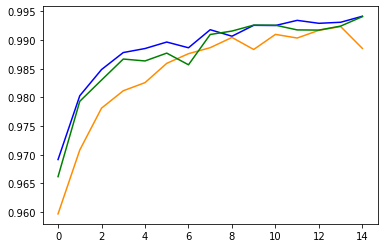

In [13]:
plt.plot(lenet5_accuracy_history, color ='blue');
plt.plot(first_custom_accuracy_history, color="darkorange");
plt.plot(second_custom_accuracy_history, color="green");

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


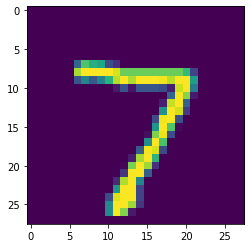

tensor(7)


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [14]:
plt.imshow(MNIST_test.test_data[0, :, :])
plt.show()
print(MNIST_test.test_labels[0])